In [9]:
#setup
import numpy as np
import pandas as pd
from DecisionTree import Tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Zadanie 5.
Zbiór danych Car Evaluation (http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) zawiera informacje o samochodach i rekomendacje dotyczącą ich ewentualnego kupna. Zapoznaj się z tym zbiorem danych i stwórz dla niego drzewo decyzyjne.

In [4]:
#load df
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 names=['buy_price', 'maint_price', 'doors', 'people', 'lug_boot', 'safety', 'target'])

In [11]:
train_df, test_df = train_test_split(df, test_size=0.3333)
tree_gini = Tree(train_df, criterion='gini')
tree_entropy = Tree(train_df, criterion='infogain_ratio')

In [12]:
pred_gini, pred_entropy = [], []
for i in range(len(test_df)):
    pred_gini.append(tree_gini.classify(test_df.iloc[i]))
    pred_entropy.append(tree_entropy.classify(test_df.iloc[i]))
    
conf_gini = metrics.confusion_matrix(np.array(pred_gini), test_df['target'])
conf_entropy = metrics.confusion_matrix(np.array(pred_entropy), test_df['target'])

print('Cofussion matrix for gini', conf_gini)
print('Cofussion matrix for entropy', conf_entropy)

Cofussion matrix for gini [[105   1   9   3]
 [  4  15   0   8]
 [ 11   2 394   1]
 [  4   2   0  17]]
Cofussion matrix for entropy [[105   3   9   1]
 [  6  15   0   5]
 [ 10   0 394   0]
 [  3   2   0  23]]


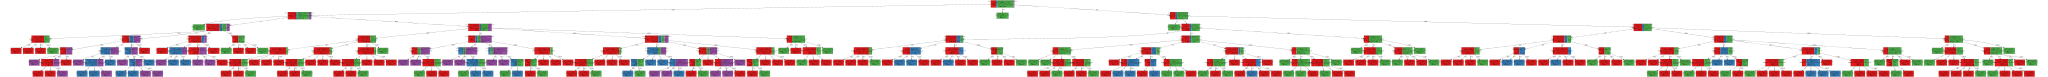

In [13]:
tree_gini.draw()

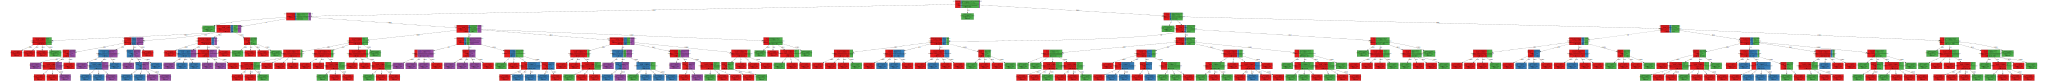

In [14]:
tree_entropy.draw()